# Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading dataset

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
x=data.data
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Data Preprocessing

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<font color='green'>Since there is no null values in any columns, no need to handle</font>

In [16]:
df.duplicated().sum()

1

In [17]:
df=df.drop_duplicates()

<font color='green'>Hence handled duplicates</font>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


<font color='green'>Since there is no columns of object data type, no encoding is needed</font>

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

# Clustering Algorithm Implementation 

### A) KMeans Clustering

<b>How K-Means Works?</b>
<font color='blue'> K is the the number of clusters. We randomly initialize K points or centroids. and then assign each data point to their closest centroid, which will form the predefined K clusters
Then calculate the variance and place a new centroid of each cluster and repeats the steps, which means reassign each datapoint to the new closest centroid of each cluster
Step-6: If any reassignment occurs, again the variance calculated and place a new centroid of each cluster. The process halts once the centroid become stableor the defined iterations achieved</font>

<b>Why K-Means?</b> <font color='blue'>K-Means works well when the number of clusters is known or can be estimated. Since the Iris dataset has 3 natural clusters, K-Means is a good option for this problem. Additionally, it scales well to large datasets.</font>

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_scaled)

# Predict clusters
clusters = kmeans.predict(x_scaled)

C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


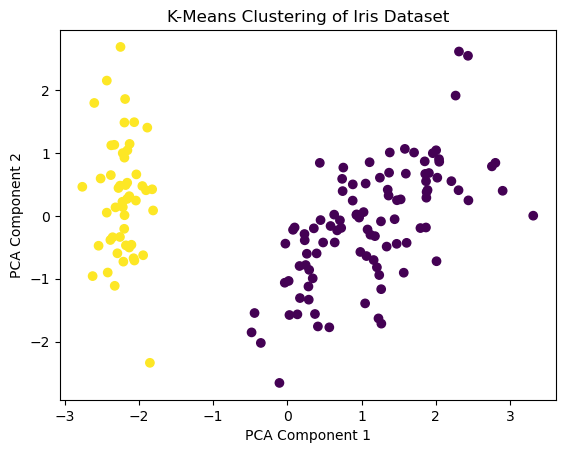

In [70]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

### B) Hierarchical Clustering

<b>How Hierarchical Clustering Works?</b>
<font color='blue'> Hierarchical clustering is an unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster.  It builds a hierarchy of clusters using either an agglomerative (bottom-up) or divisive (top-down) approach. In agglomerative clustering, which we use here, each data point starts as its own cluster, and clusters are merged iteratively based on a similarity measure </font>

<b>Why Hierarchical Clustering?</b> <font color='blue'>Hierarchical Clustering doesn’t needs a predefined number of clusters like KMeans.
It’s useful for datasets where the relationships between points might form a hierarchy. The Iris dataset is relatively small, making Hierarchical Clustering computationally feasible.</font>

#### Dendogram

In [38]:
X = df.iloc[:,[0,3]].values

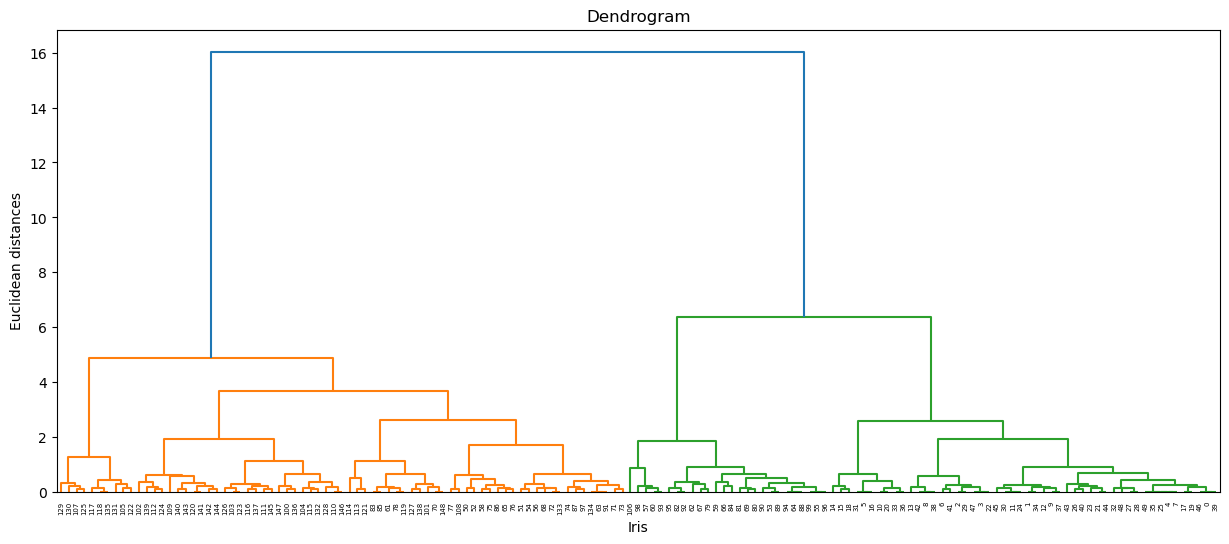

In [40]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

<b>Here the optimal number of clusters could be 2 </b>

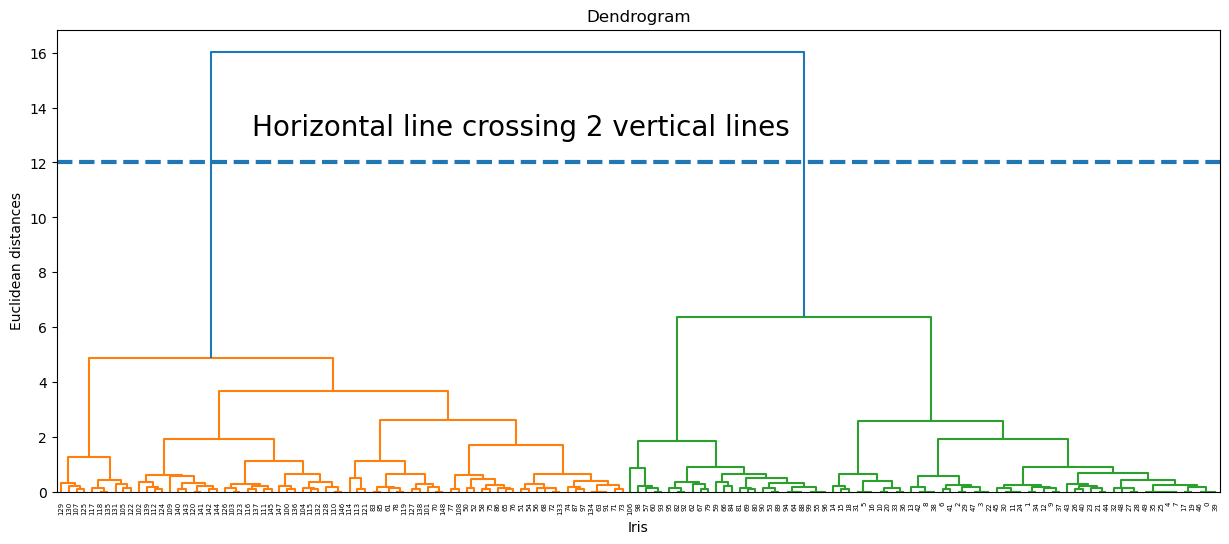

In [48]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.hlines(y=12,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=250,y=13,s='Horizontal line crossing 2 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

#### Hierarchical Clustering

In [49]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


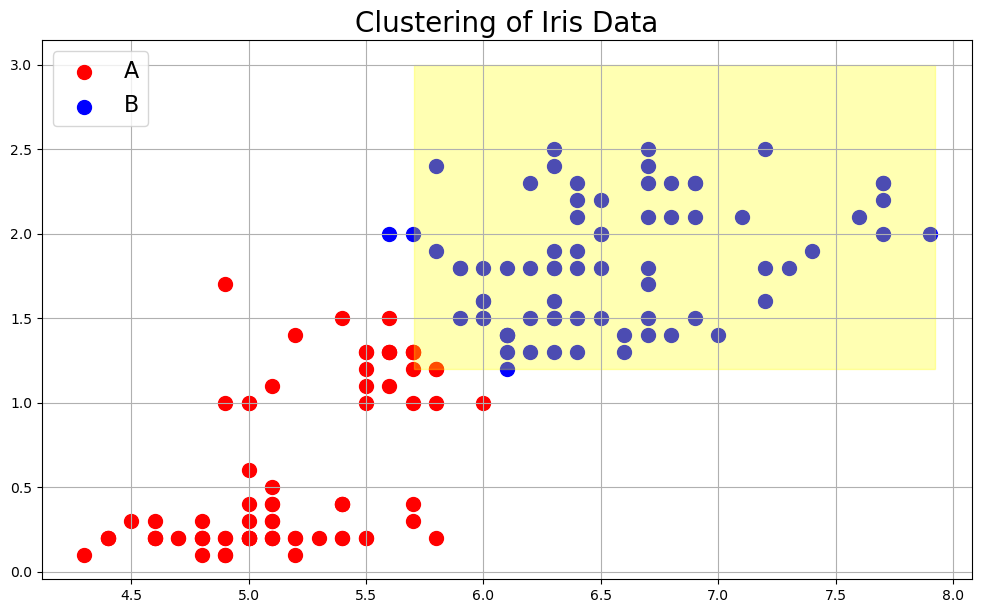

In [54]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'A')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'B')
plt.title('Clustering of Iris Data',fontsize=20)
plt.xlabel('',fontsize=16)
plt.ylabel('',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=1.2,ymax=3,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

#### Verifying the optimal number of clusters by k-means algorithm

In [55]:
from sklearn.cluster import KMeans

C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

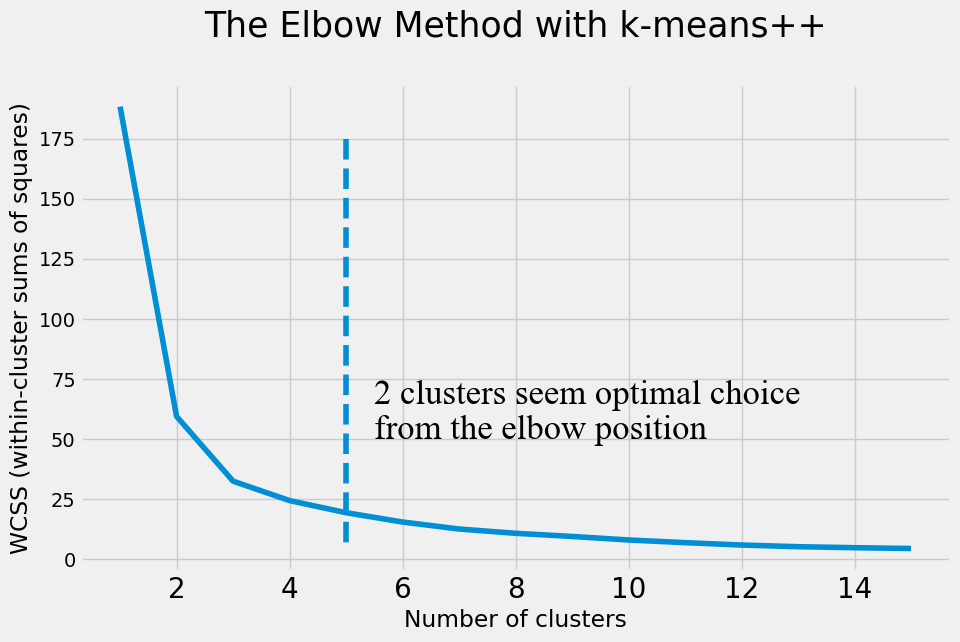

In [61]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=5,ymin=175,ymax=5,linestyles='--')
    plt.text(x=5.5,y=50,s='2 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()